In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler

import torch
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

2024-03-16 12:27:35.070880: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# print available GPUs. If so, run using that.
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
df = pd.read_csv('datasets/Dry_Bean_Dataset.csv')
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [4]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [5]:
# print the different Class values and their frequency.
df['Class'].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

We can observe that data is not unbalanced.

In [6]:
# print nan values
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

From this dataset, we will supose that no outliers are presented.
We can visualize them using seaborn.pairplot() and dealing them using some worked approaches.

In [7]:
X = df.drop(columns=['Class'], axis=1)
y = df[['Class']]

In [8]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
unique_classes = len(encoder.classes_)
encoder.classes_

array(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],
      dtype=object)

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# aggregate names to X dataframe
X_scaled_ = pd.DataFrame(X_scaled, columns=X.columns)

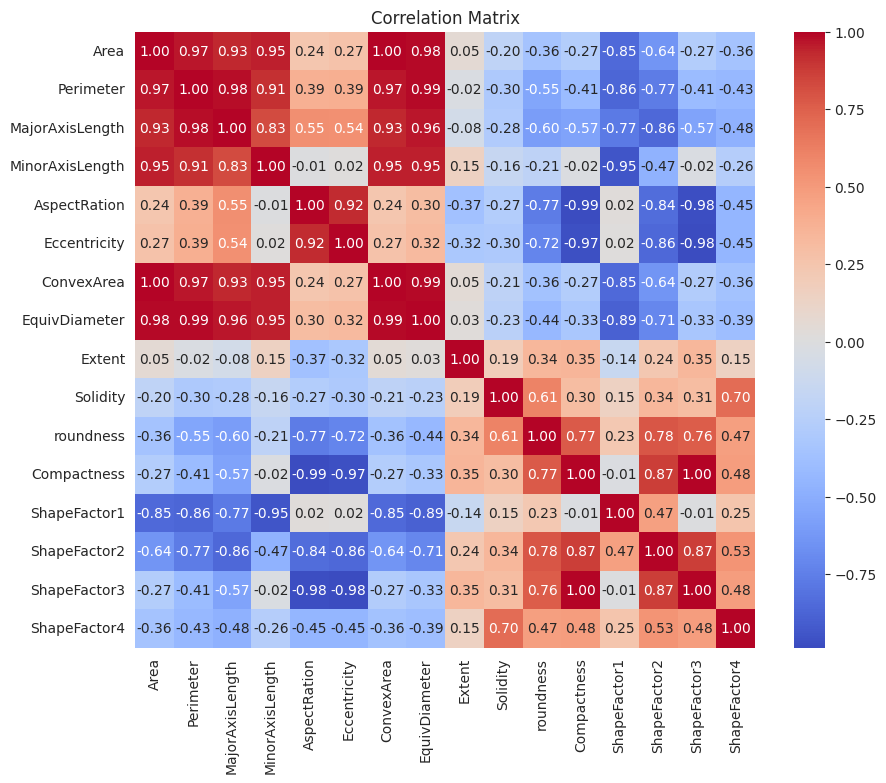

In [11]:
# Calculate correlation matrix
corr_matrix = X.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

In [12]:
# Train Random Forest model for feature importance
rf_model = RandomForestClassifier(n_estimators=100,
                                  n_jobs=-1,
                                  random_state=42)
rf_model.fit(X_scaled_, y)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [13]:
# Get feature importances
importances  = rf_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# get ordered feature names
ordered_names = [rf_model.feature_names_in_[i] for i in indices]

# Calculate standard deviations of feature importances across trees
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)

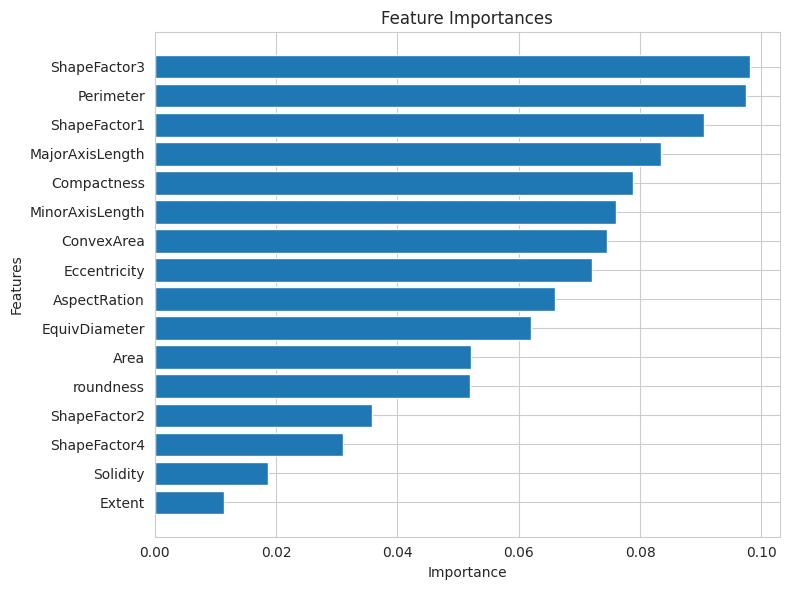

In [14]:
plt.figure(figsize=(8, 6))
plt.title("Feature Importances")
plt.barh(range(X.shape[1]), importances[indices], align="center")#, xerr=std[indices])
plt.yticks(range(X.shape[1]), ordered_names)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.gca().invert_yaxis() # the major up.
plt.show()

In [15]:
pca = PCA(n_components=16)
X_pca = pca.fit_transform(X_scaled)

In [16]:
pca.explained_variance_ratio_

array([5.54664386e-01, 2.64309732e-01, 8.00656422e-02, 5.11408029e-02,
       2.73929290e-02, 1.14976093e-02, 6.97650724e-03, 3.25082500e-03,
       5.16266295e-04, 9.08681206e-05, 6.58867938e-05, 1.83739336e-05,
       9.29966038e-06, 6.25641678e-07, 1.34132086e-07, 1.11549485e-07])

In [17]:
dim=6
X_reduced = X_pca[:, 0:dim]
X_reduced

array([[-4.98156089,  1.82469732,  0.74902095, -0.39081166, -0.03353132,
         0.30121206],
       [-5.43679235,  2.93236494,  2.18237404, -0.43195956,  1.2264641 ,
         0.04557478],
       [-4.75808821,  1.82688375,  0.51403759, -0.12585375,  0.13150549,
         0.20853786],
       ...,
       [-1.41751491,  0.14119377, -0.38720629, -0.4864387 , -0.38355538,
        -0.13733288],
       [-1.11466563, -0.21267949,  0.1440882 , -0.84190319, -0.48680454,
        -0.0971603 ],
       [-0.76643691, -0.64651393, -0.9941214 ,  0.81467901,  0.25825818,
         0.0521626 ]])

In [18]:
# reshape y
y_reshaped = y[:, np.newaxis]
y_reshaped.shape

(13611, 1)

In [19]:
df_new = pd.DataFrame(np.concatenate((X_reduced, y_reshaped), axis=1),
                      columns=[f'feature_{i}' for i in range(dim)]+['y'])

df_new['y'] = df_new['y'].astype('int32')
df_new

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,y
0,-4.981561,1.824697,0.749021,-0.390812,-0.033531,0.301212,5
1,-5.436792,2.932365,2.182374,-0.431960,1.226464,0.045575,5
2,-4.758088,1.826884,0.514038,-0.125854,0.131505,0.208538,5
3,-4.300541,2.003661,3.554447,0.082964,0.800766,0.502323,5
4,-6.349340,4.088205,1.179199,-0.830357,-0.037073,-0.278306,5
...,...,...,...,...,...,...,...
13606,-1.125616,-0.441079,-0.875509,-0.719279,-0.298148,0.026482,3
13607,-1.605011,0.495998,-0.840558,0.797433,0.017084,-0.090453,3
13608,-1.417515,0.141194,-0.387206,-0.486439,-0.383555,-0.137333,3
13609,-1.114666,-0.212679,0.144088,-0.841903,-0.486805,-0.097160,3


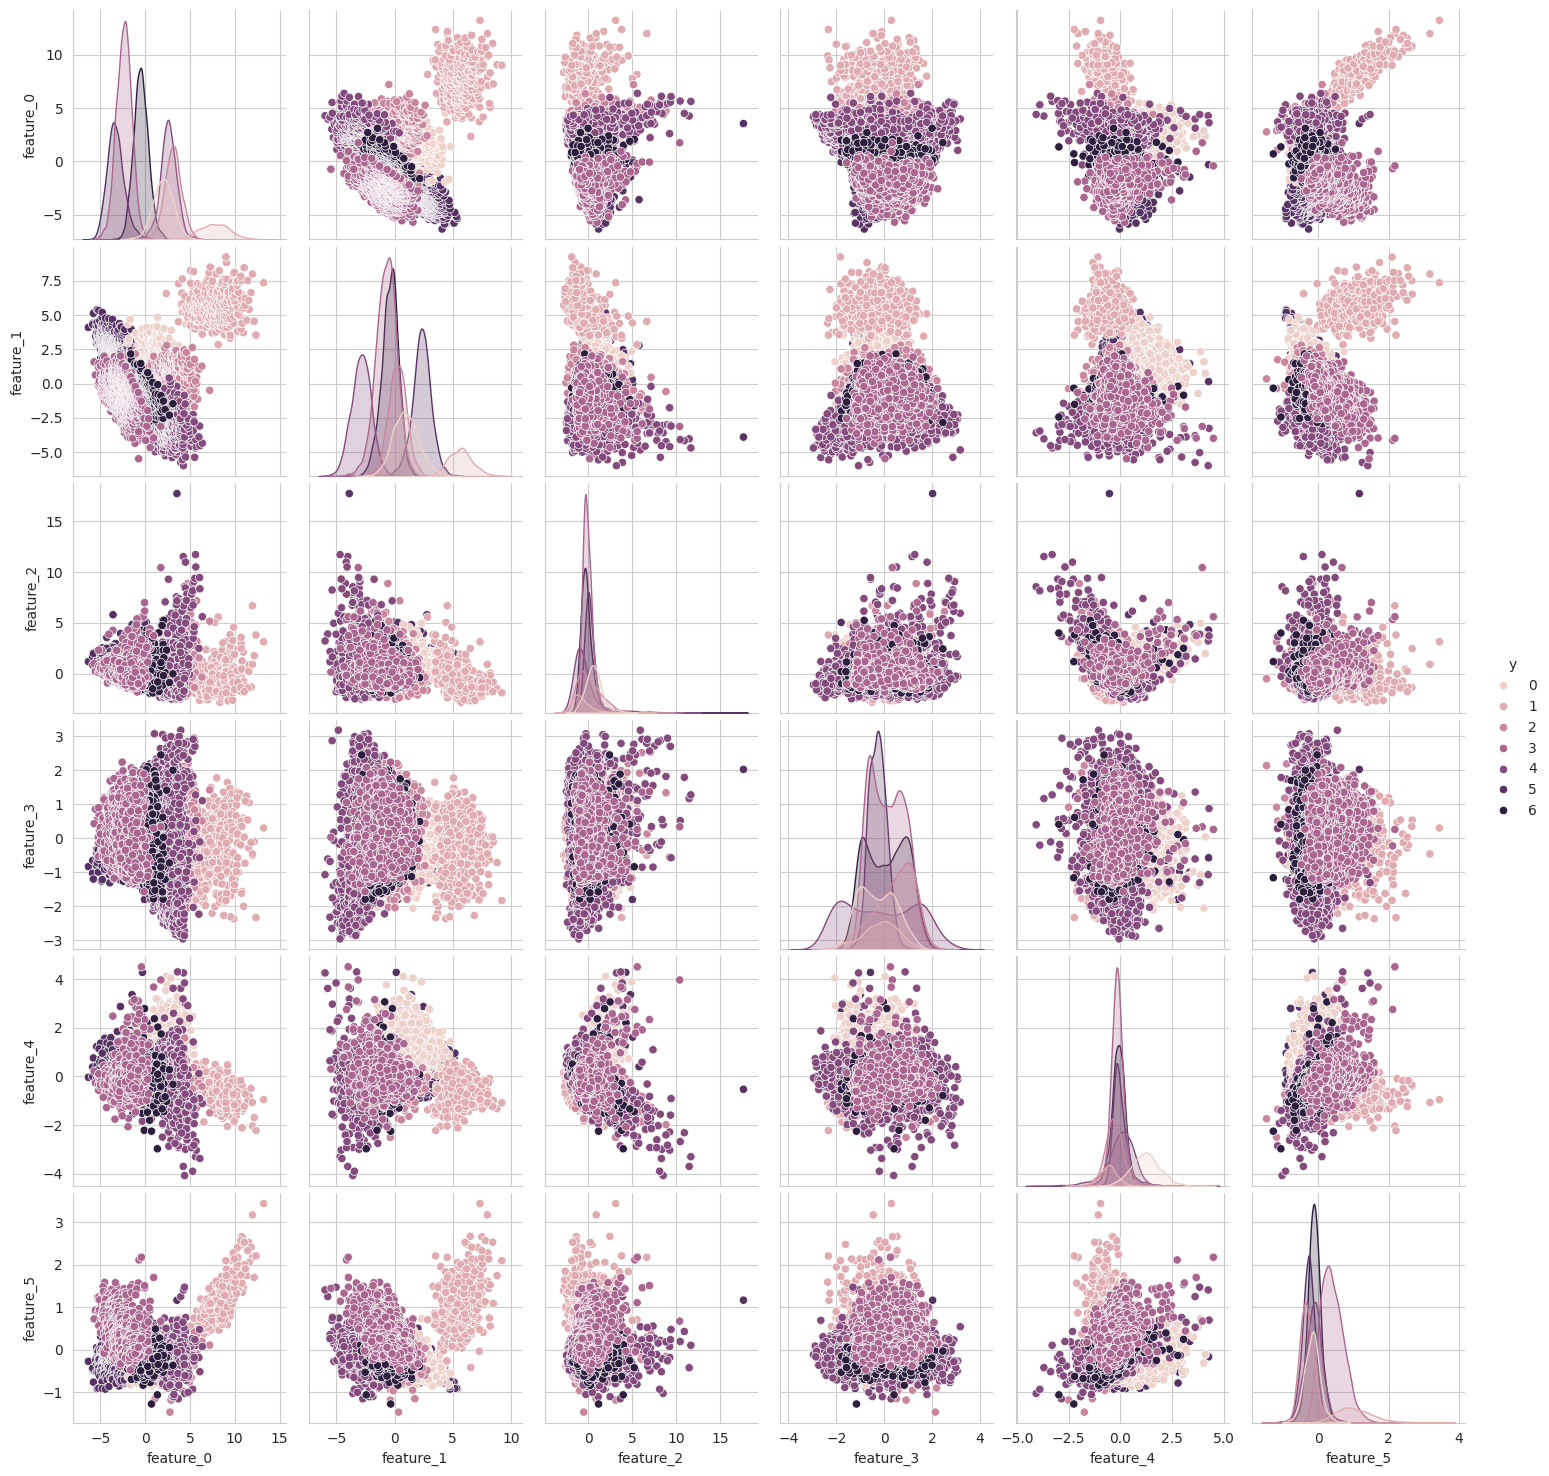

In [21]:
sns.pairplot(df_new, hue="y")

In [22]:
y_oneHotEncoded = to_categorical(y)
y_oneHotEncoded

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

y_oneHotEncoded is really a matrix

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_oneHotEncoded, test_size=0.2, random_state=42)

In [24]:
# Define the model
activations = ['relu', 'tanh'] # 'sigmoid'

def get_model(act_functions):
    # model architecture
    optimizer = Adam(learning_rate=0.001)
    model = Sequential()
    model.add(Dense(16, input_shape=(dim,), activation=act_functions[0]))
    model.add(Dense(32, activation=act_functions[1]))
    model.add(Dense(unique_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

use 'sparse_categorical_crossentropy' as loss function when the target y is not OneHotEncoded (when unique_classes is large).

In [25]:
sample_sizes = np.arange(0.1, 1.0, 0.1)

train_accuracies = {}
test_accuracies  = {}

for act0 in activations:
    for act1 in activations:

        setting = [act0, act1]
        model = get_model(setting)

        # Store initial model weights
        init_weights = model.get_weights()

        # Lists for storing accuracies
        train_accs = []
        test_accs  = []

        for train_size in sample_sizes:

            # Split a fraction according to train_size
            X_train_frac, _, y_train_frac, _ = train_test_split(X_train, y_train, train_size=train_size, random_state=42)

            # Set model initial weights
            model.set_weights(init_weights)

            # Fit model on the training set fraction
            model.fit(X_train_frac, y_train_frac,
                      epochs=100,
                      verbose=0,
                      callbacks=[EarlyStopping(monitor='loss', patience=5)],
                      )

            # Get the accuracy for this training set fraction
            train_acc = model.evaluate(X_train_frac, y_train_frac, verbose=0)[1]
            train_accs.append(train_acc)

            # Get the accuracy on the whole test set
            test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
            test_accs.append(test_acc)

            print(f"Setting [{act0}, {act1}] with size {round(train_size, 2)}")

        train_accuracies[f"{act0}-{act1}"] = train_accs
        test_accuracies[f"{act0}-{act1}"]  = test_accs

I0000 00:00:1710613808.636069   13302 service.cc:145] XLA service 0x764a88009120 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1710613808.636094   13302 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1060, Compute Capability 6.1
I0000 00:00:1710613809.759130   13302 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Setting [relu, relu] with size 0.1
Setting [relu, relu] with size 0.2
Setting [relu, relu] with size 0.3
Setting [relu, relu] with size 0.4
Setting [relu, relu] with size 0.5
Setting [relu, relu] with size 0.6
Setting [relu, relu] with size 0.7
Setting [relu, relu] with size 0.8
Setting [relu, relu] with size 0.9
Setting [relu, tanh] with size 0.1
Setting [relu, tanh] with size 0.2
Setting [relu, tanh] with size 0.3
Setting [relu, tanh] with size 0.4
Setting [relu, tanh] with size 0.5
Setting [relu, tanh] with size 0.6
Setting [relu, tanh] with size 0.7
Setting [relu, tanh] with size 0.8
Setting [relu, tanh] with size 0.9
Setting [tanh, relu] with size 0.1
Setting [tanh, relu] with size 0.2
Setting [tanh, relu] with size 0.3
Setting [tanh, relu] with size 0.4
Setting [tanh, relu] with size 0.5
Setting [tanh, relu] with size 0.6
Setting [tanh, relu] with size 0.7
Setting [tanh, relu] with size 0.8
Setting [tanh, relu] with size 0.9
Setting [tanh, tanh] with size 0.1
Setting [tanh, tanh]

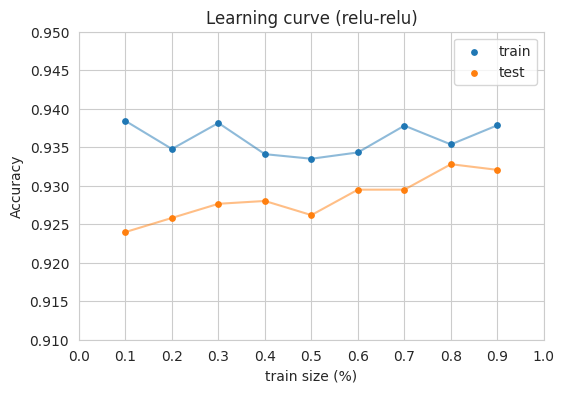

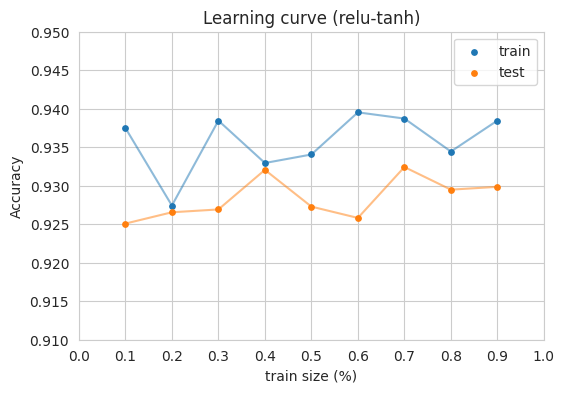

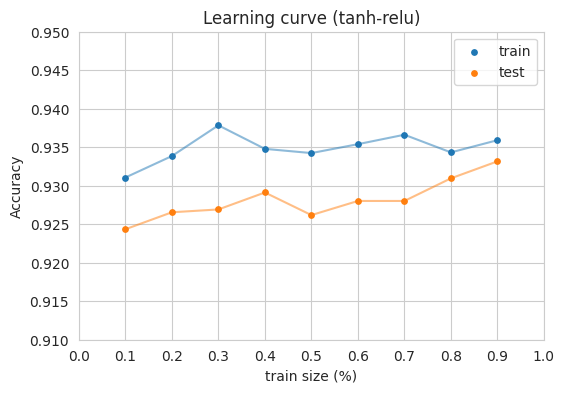

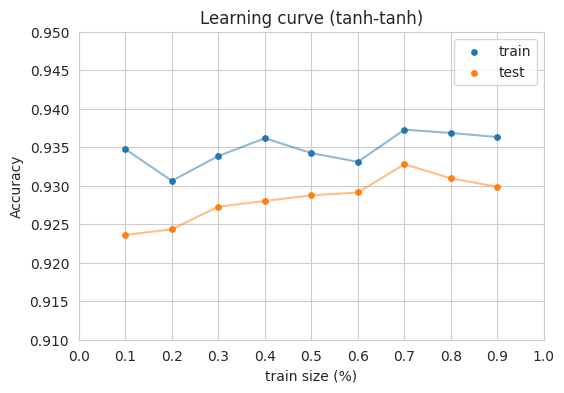

In [26]:
for setting in train_accuracies.keys():

    plt.figure(figsize=(6, 4))
    plt.scatter(sample_sizes, train_accuracies[setting], s=15)
    plt.scatter(sample_sizes, test_accuracies[setting],  s=15)

    plt.plot(sample_sizes, train_accuracies[setting], alpha=0.5)
    plt.plot(sample_sizes, test_accuracies[setting],  alpha=0.5)

    plt.xticks(ticks=np.arange(0, 1.1, 0.1))
    plt.ylim([0.91, 0.95])

    plt.title(f"Learning curve ({setting})")
    plt.ylabel("Accuracy")
    plt.xlabel("train size (%)")
    plt.legend(["train", "test"])
    plt.show()

A good choice is tanh-relu, where both train and test samples are getting be closer while are increasing.
Once chosen the model, we can create a pipeline in order to make the next process:

1) make labelEncoding and apply to_categorial() to convert the target y into a matrix
2) Scalling the feature set X and applying PCA (keep top 6)
3) get training and test samples by splitting
4) define the wished neural-networks model with best hyperparams
5) make prediction on the new (unseen) dataset